# 決定木 (decision tree)
---
- IF文の連続で結果を予測するモデルである。
    - 精度は低いが、結果に対する説明力 (理由の理解しやすさ) が高い。説明力が重要なプロジェクトでよく用いられる。
    - 説明力が高いため、説明力の低い他のモデル（深層学習など）と併用して使われることがある。
    - 数値データとカテゴリデータが混在していても、使うことができる。
    - 回帰モデルと分類モデルの両方に使うことができる。
- 元のデータを根 (root) ・分類の最終点を葉 (leaf) ・根から葉に至る途中を枝 (branch) と呼ぶ。

In [3]:
import pandas as pd
from sklearn import tree
import pydotplus
from IPython.display import Image
%matplotlib inline

- PyDotPlusは決定木などの可視化に便利なPythonライブラリである。[pydotplus-PyPI](https://pypi.org/project/pydotplus/)
- Graphvizと合わせてインストールすることで、可視化が可能になるので、余力のある人は両方インストールした方が良い。[Graphviz公式](https://graphviz.org/download/)

## 決定木モデルの例
---
- 推骨の手術後の猫背の有無（present, absent）を、月齢や関連する推骨の数から予測する、決定木モデルを例として取り上げる。

In [7]:
# データの読み込みと確認
kyphosis = pd.read_csv('./data/kyphosis.csv')
kyphosis.iloc[:, 0] = pd.Categorical(kyphosis.iloc[:, 0])
kyphosis.tail()

,術後の猫背の有無,月齢,関係する椎骨の数,手術した椎骨の最初の番号
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


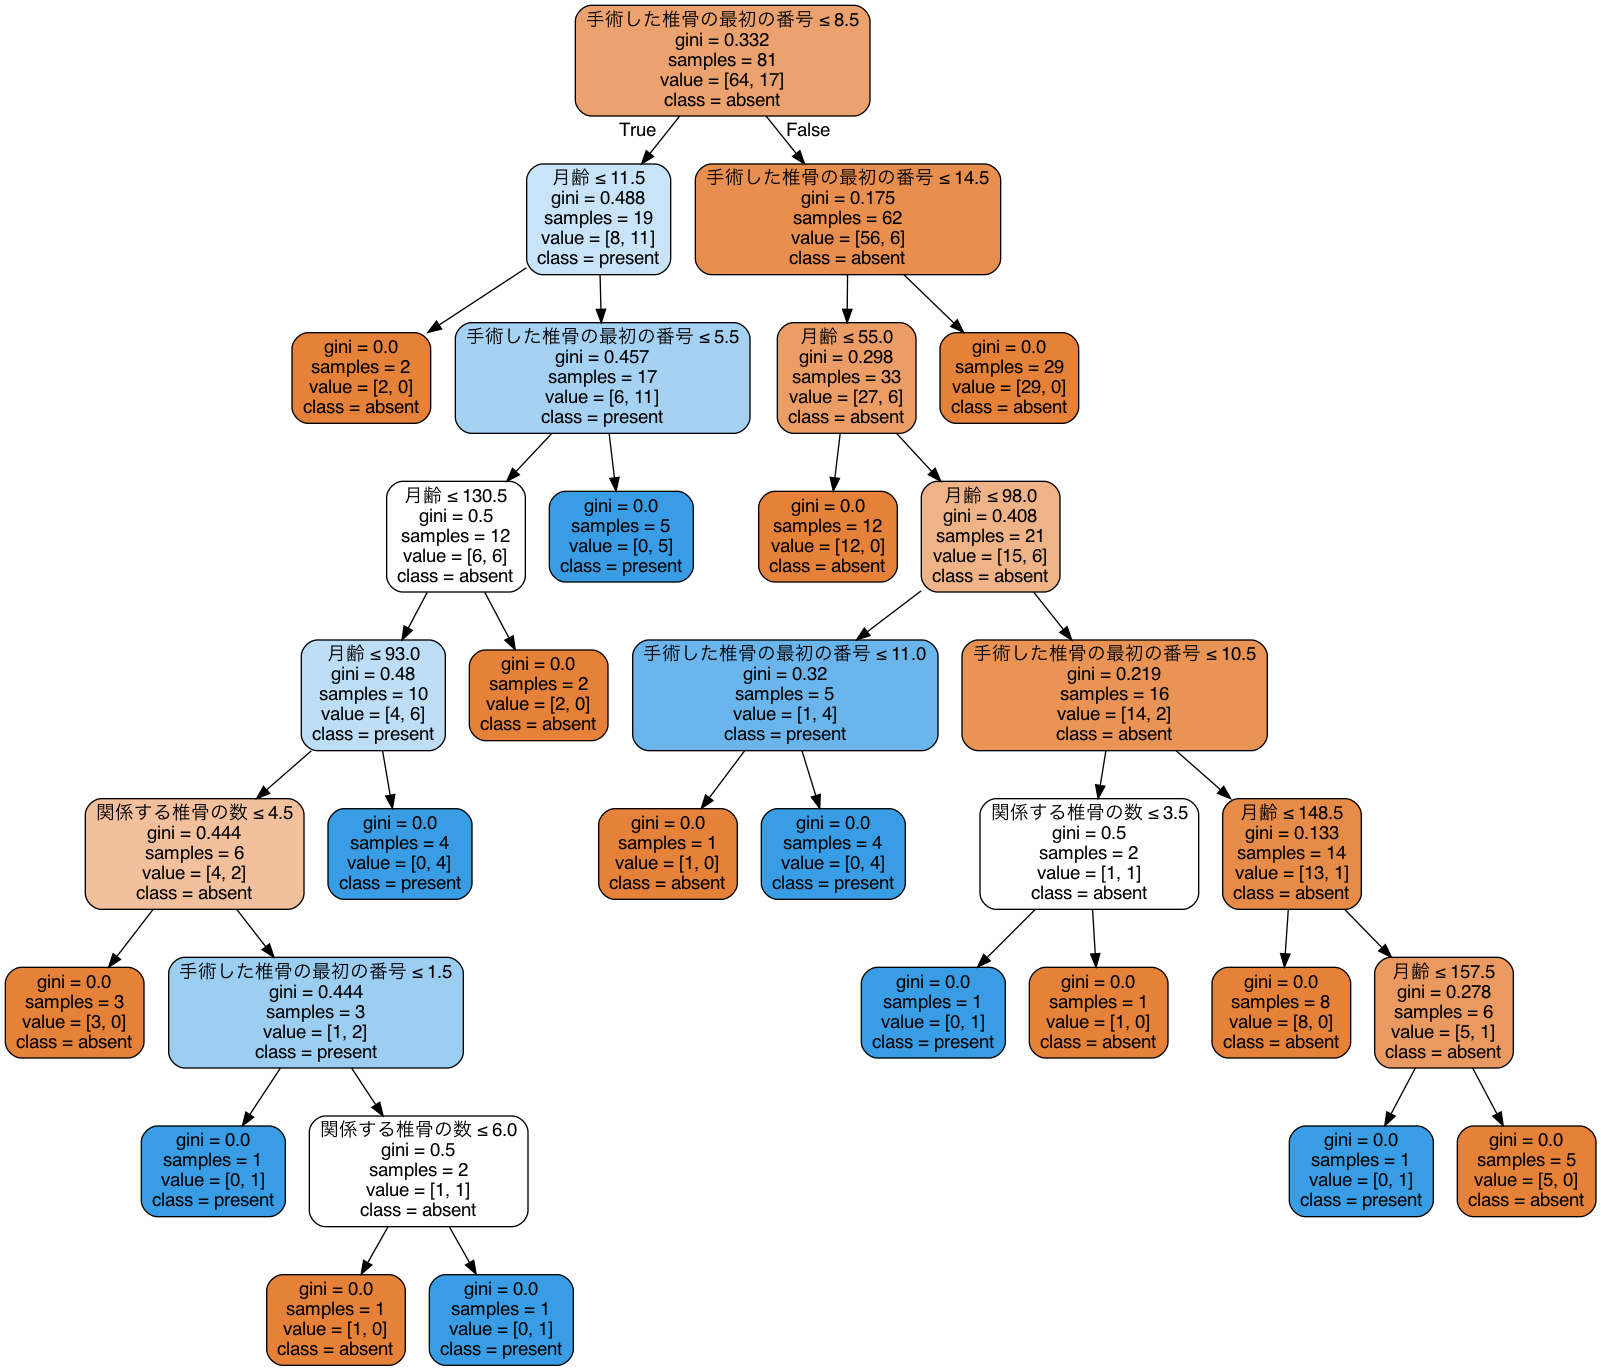

In [9]:
# 変数の格納
x = kyphosis.iloc[:, 1:]
y = kyphosis['術後の猫背の有無']
feature_names = kyphosis.columns[1:]
class_names = kyphosis['術後の猫背の有無'].cat.categories

# 可視化
model = tree.DecisionTreeClassifier().fit(x, y)
dot = tree.export_graphviz(model, out_file=None, feature_names=feature_names,
                           class_names=class_names, filled=True, rounded=True,
                           special_characters=True)
graph = pydotplus.graph_from_dot_data(dot)
image = Image(graph.create_png())
display(image)

## 分岐の基準（不純度）
---
- 情報の不純度が最も下がるように、枝が分岐している。
    - 分類の場合、1つのクラスだけで葉が構築されていれば不純度は低く、様々なクラスが混じっていると不純度は高くなる。
    - 不純度の指標としては**ジニ不純度**や**エントロピー**が用いられる。
        - サンプルに含まれるクラスの数を $c$、クラス $i$ に属するサンプルの割合を $P_i$ とすると、以下のように表すことができる。
        
ジニ不純度： ${\displaystyle I_{G} =1-\sum ^{c}_{i=1} p^{2}_{i}}$  
エントロピー： ${\displaystyle I_{H} =-\sum ^{c}_{i=1} p_{i} \cdot log( p_{i})}$

![ジニ不純度とエントロピー](./image/decision_tree_01.png)

## Pythonでの実行方法
---
- sklearn.tree.DecisionTreeClassifier を用いる。

In [10]:
# 関数の情報を確認
help(tree.DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best ran

In [11]:
# データの読み込みと確認
from sklearn.datasets import load_iris
iris = load_iris()
x, y = iris.data, iris.target
df = pd.DataFrame(x, columns=iris.feature_names)
label = pd.Categorical(y)
label.categories = iris.target_names
df['label'] = label
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


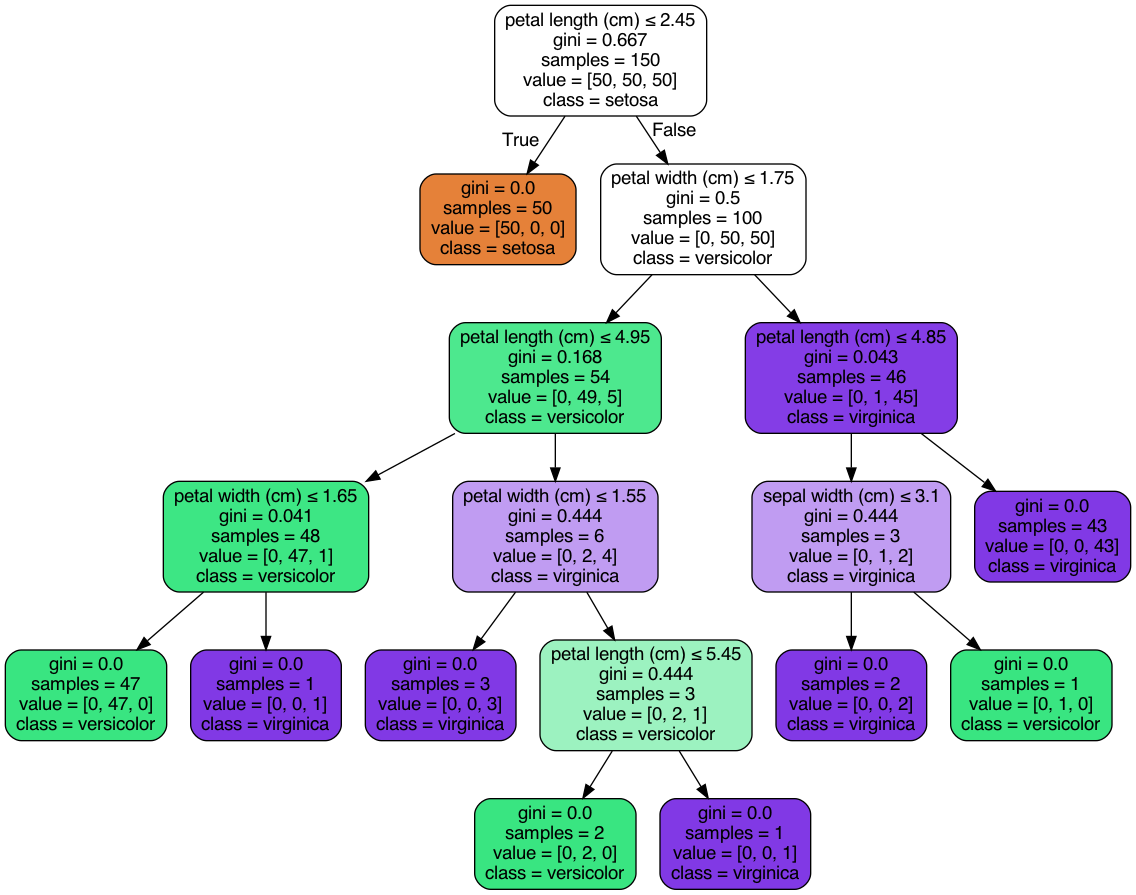

In [15]:
# 変数の格納
feature_names = iris.feature_names
class_names = iris.target_names

# モデルの構築
model = tree.DecisionTreeClassifier()
model.fit(x, y)

# 可視化
dot = tree.export_graphviz(model, out_file=None, feature_names=feature_names,
                           class_names=class_names, filled=True, rounded=True,
                           special_characters=True)
graph = pydotplus.graph_from_dot_data(dot)
image = Image(graph.create_png())
display(image)

## 予測
---
- 新たなデータの予測には predict メソッドを用いる。

In [30]:
# 特徴ラベルの確認
print(feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [31]:
# 試しに、sepal length=5.1cm, sepal width=3.5cm, petal length=1.4cm, petal width=0.2cm のデータを入力し、結果を見る。
model.predict([[5.1, 3.5, 1.4, 0.2]])

array([0])

In [33]:
# 出力[0]がどのクラスであったかを確認
class_names[0]

'setosa'